# **Compozent - Data Science & Business Analytics Internship**

# **Basic Task -  Exploratory Data Analysis on Dataset - Flight Price**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Analyze a dataset and gain insights by creating visualizations and summary statistics.

### Dataset link: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('flight.csv',sep ="," ,encoding="utf-8")

In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.shape

(300153, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data.drop(columns='Unnamed: 0' ,inplace=True)

In [ ]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Here we make sure of there is not exit missing values and not duplicated data .

Data is ready to be studied.

### EDA of Features & Target!

In [ ]:
data['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

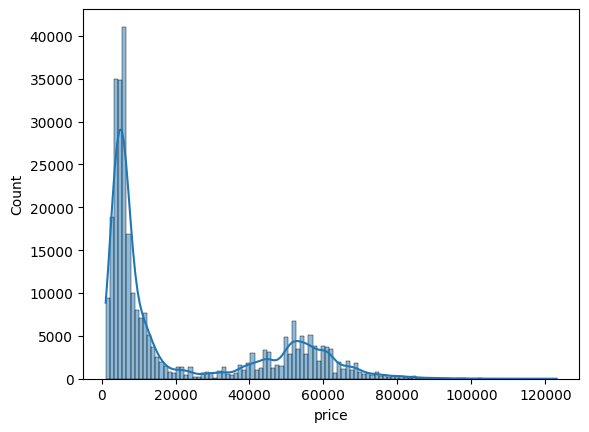

In [ ]:
sns.histplot(data=data['price'] ,kde=True)

Our target variable has a right skewness.

Most of our price values in a range of 1000-40000.& we can predict that these values coantains alot of Economy class ,little of Businesss class.

In [ ]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

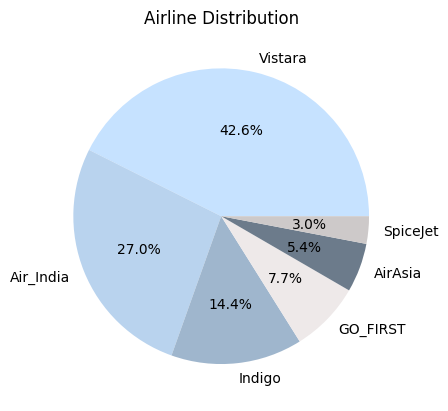

In [ ]:
plt.title('Airline Distribution')
airline_counts = data['airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', colors = ["#C6E2FF","#B9D3EE" ,"#9FB6CD","#EEE9E9","#6C7B8B","#CDC9C9"])

plt.show()

In [ ]:
data['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

<Axes: title={'center': 'Class'}, ylabel='class'>

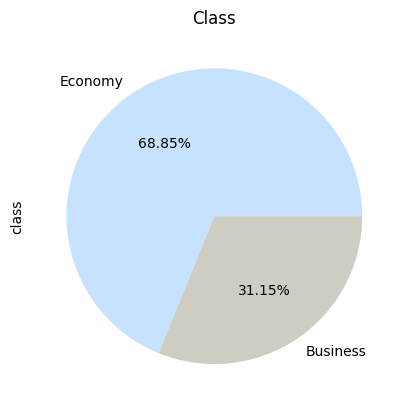

In [ ]:
plt.title('Class')
round(data['class'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = "%1.2f%%",colors = ["#C6E2FF" , "#CDCDC1" ])

As show , The most class which books tickets is Economy ,But the most higher price range is a Business Class.

In [ ]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

<Axes: xlabel='stops', ylabel='price'>

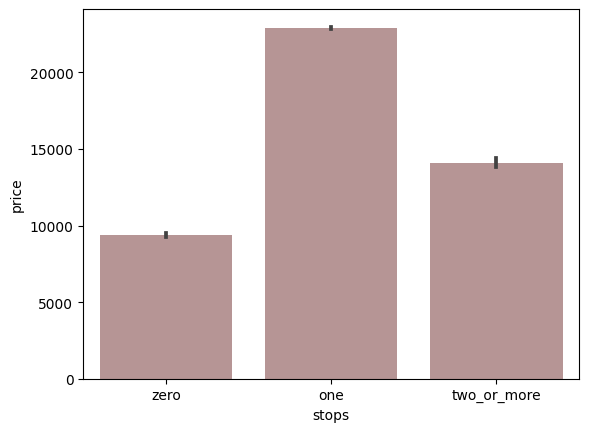

In [ ]:
sns.barplot(data ,x ="stops" ,y="price",color='#BC8F8F')

It seems that the most higher price is a one stops.

In [ ]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [ ]:
fig = px.bar(data['source_city'].value_counts(), x=data['source_city'].value_counts().index, y=data['source_city'].value_counts().values)
fig.show()

### Visualizing the dataset in some other Aspects

<Axes: title={'center': 'Distribution of Source City'}, ylabel='source_city'>

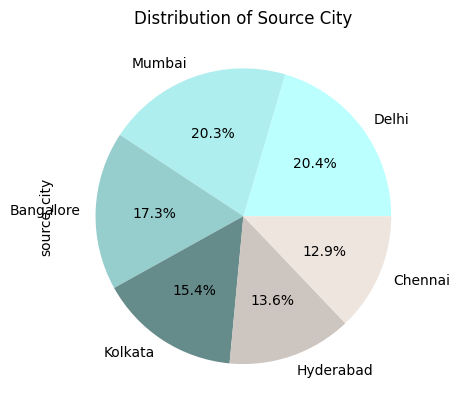

In [ ]:
plt.title('Distribution of Source City')
round(data['source_city'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",colors = ["#BBFFFF" , "#AEEEEE" ,"#96CDCD" , "#668B8B" , "#CDC5BF",	"#EEE5DE"] )

<Axes: xlabel='departure_time', ylabel='price'>

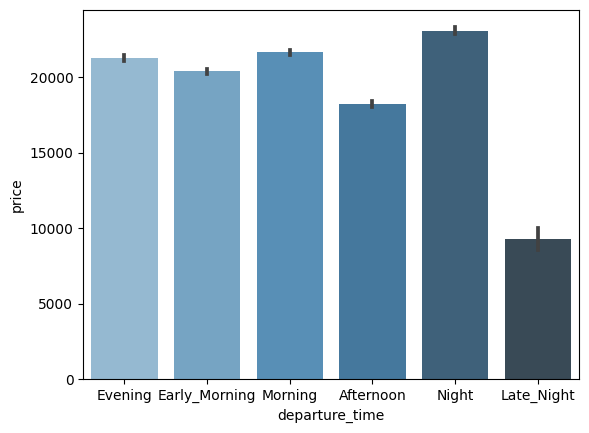

In [ ]:
sns.barplot(x='departure_time',y ='price',data=data,palette='Blues_d')

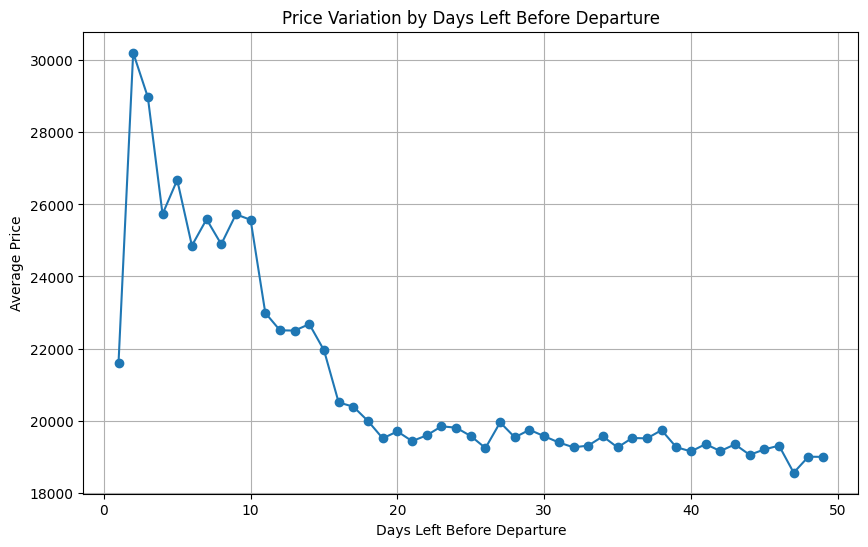

In [ ]:
average_price_by_days_left = data.groupby('days_left')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_days_left.index, average_price_by_days_left.values, marker='o')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.title('Price Variation by Days Left Before Departure')
plt.grid(True)
plt.show()

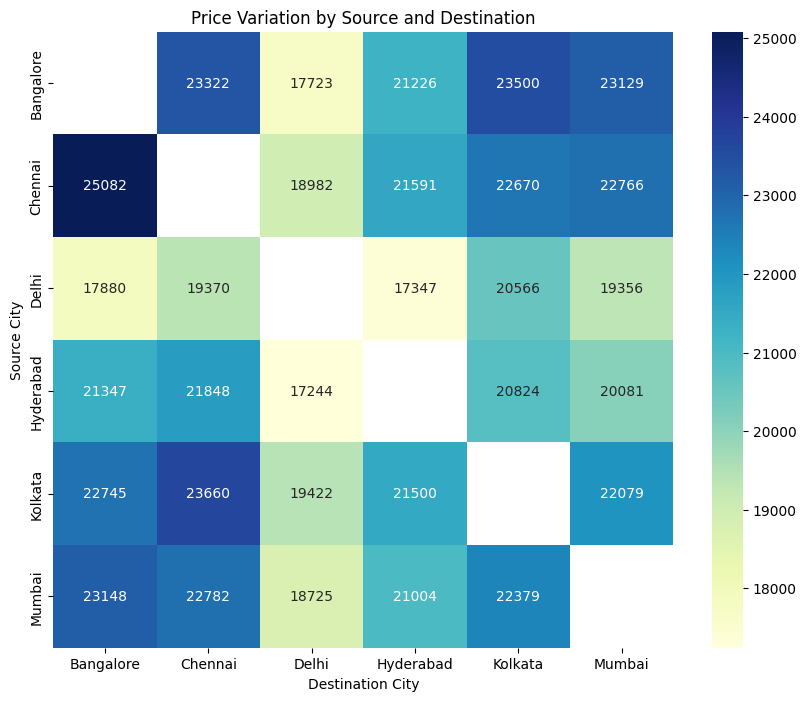

In [ ]:
pivot_table = data.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Price Variation by Source and Destination')
plt.show()

In [ ]:
average_prices = data.groupby('airline')['price'].mean().reset_index()

fig = px.bar(average_prices, x='airline', y='price', title='Average Ticket Price for Each Airline')
fig.show()

In [ ]:
departure_time_counts = data['departure_time'].value_counts().reset_index()
departure_time_counts.columns = ['departure_time', 'price']

fig = px.bar(departure_time_counts, x='departure_time', y='price', title='Preferred Departure Time')
fig.update_xaxes(type='category')
fig.show()

### Conclusion : There is a dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. The features include the company (airline name), flight code, source city, departure time, number of stops, arrival time, destination city, seat class, duration of travel, days left before the trip, and our target is ticket price. The dataset provides valuable information for analyzing flight booking options and compared these features with target(price).

# **--------------------------------------------Thank You--------------------------------------------**